In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Collecting / Cleaning

In [7]:
df = pd.read_csv("vivino-2.csv")
df.head()

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
0,Baron de Ley,2020,8729994,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose,ARG
1,New Age,N.V.,7704484,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White,ARG
2,Alamos,2018,68764,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose,ARG
3,Alamos,2019,2166,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White,ARG
4,Alamos,2020,1387085,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red,ARG


In [8]:
def cleaning_data(dataset):
    dataset['Year'] = dataset['Year'].replace('N.V.', np.NAN)
    dataset.dropna(subset = ['Year'], inplace=True)
    dataset['Year'] = pd.to_numeric(dataset['Year'], errors='coerce')
    dataset.drop('Wine_ID', axis=1, inplace=True)
    dataset.drop('Country_Code', axis=1, inplace=True)
    return dataset

df = cleaning_data(df)

In [9]:
df.isnull().sum()

Winery           0
Year             0
Wine             0
Rating           0
Reviews          0
Price            0
Region           0
Primary_Grape    0
Natural          0
Country          0
Style            0
dtype: int64

# Data Exploration
### Printing summarize dataset

In [10]:
def print_summarize_dataset(dataset):
    print("Dataset dimension: ")
    print(dataset.shape)
    print("\nFirst 10 rows of dataset: ")
    print(dataset.head(10))
    print("\n10 random rows from the data set: ")
    print(dataset.sample(10))
    print("\nStatistical summary: ")
    print(dataset.describe())
    print("\nAdditional informations: ")
    print(dataset.info())

print_summarize_dataset(df)

Dataset dimension: 
(11298, 11)

First 10 rows of dataset: 
                 Winery  Year                                Wine  Rating  \
0          Baron de Ley  2020              Rosado de Lágrima 2020     4.2   
2                Alamos  2018                    Malbec Rosé 2018     3.9   
3                Alamos  2019                      Torrontes 2019     3.8   
4                Alamos  2020             Cabernet Sauvignon 2020     3.6   
5                Alamos  2020                     Chardonnay 2020     3.7   
6                Alamos  2020                         Malbec 2020     3.8   
7               Amalaya  2020  Blanco (Torrontés - Riesling) 2020     3.8   
8                Alamos  2019                        Bonarda 2019     3.8   
9   Bodega Piedra Negra  2019      Alta Colección Pinot Gris 2019     3.6   
10               Alamos  2020                      Torrontes 2020     3.7   

    Reviews  Price        Region Primary_Grape  Natural    Country  Style  
0        42   7.

In [11]:
df.describe()

,Year,Rating,Reviews,Price
count,11298.000000,11298.000000,11298.000000,11298.000000
mean,2016.450611,3.928306,324.715082,43.706449
std,4.882282,0.320963,784.534283,119.851283
min,1900.000000,2.600000,25.000000,2.070000
25%,2016.000000,3.700000,53.000000,9.002500
50%,2018.000000,3.900000,112.000000,17.950000
75%,2019.000000,4.200000,283.750000,36.985000
max,2021.000000,4.900000,22467.000000,6511.310000


In [12]:
df.head(5)

,Winery,Year,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style
0,Baron de Ley,2020,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose
2,Alamos,2018,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose
3,Alamos,2019,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White
4,Alamos,2020,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red
5,Alamos,2020,Chardonnay 2020,3.7,851,8.00,Mendoza,Malbec,False,Argentina,White


## Data Visualization

In [13]:
def get_country(dataset):
  """A function that takes a dataset as an argument and returns the names of the top winery countries"""
  plt.figure(figsize=(18, 10))
  plt.title('Leading winery countries', fontsize = 20)
  sns.countplot(y='Country', data=dataset)
  plt.show()

# get_country(df)

In [14]:
def get_wine_style(dataset):
  """A function that takes a dataset as an argument and returns wine styles"""
  plt.figure(figsize=(18, 6))
  plt.title('The styles of wine', fontsize = 20)
  sns.countplot(y='Style', data=dataset)
  plt.show()

# get_wine_style(df)

In [15]:
def wine_each_country(dataset):
  """A function that takes a dataset as an argument and returns the number of each type of wine for each country"""
  plt.figure(figsize=(18, 10))
  plt.title('Number of each wine type for each country', fontsize = 20)
  sns.countplot(data=dataset, x='Country', hue='Style')
  plt.show()

# wine_each_country(df)

In [16]:
def wine_each_region(dataset):
  """A function that takes a dataset as an argument and returns the percentage of wine types for the top 10 regions"""
  plt.figure(figsize=(18, 14))
  plt.title('Wine types for the top 10 regions', fontsize = 20)
  region = dataset.groupby(['Region','Style'])['Wine'].count().nlargest(10)
  region.plot(kind='pie', autopct='%1.0f%%', label='')
  plt.show()

# wine_each_region(df)

In [17]:
def get_count_wines(dataset):
  """A function that takes a dataset as an argument and returns the number of wines sold for each rating"""
  sns.set_style('darkgrid')
  plt.figure(figsize = (20, 10))
  x = dataset['Rating'].value_counts().index.tolist()
  y = dataset['Rating'].value_counts().values.tolist()
  plt.title('Number of wines sold for each rating', fontsize = 20)
  plt.ylabel('The number of Rating')
  plt.xlabel('Rating')
  plt.xticks(rotation=90)
  sns.barplot(x, y, palette = 'hls', data=dataset)
  plt.show()

# get_count_wines(df)

In [18]:
def get_style_wines(dataset):
  """A function that takes a dataset as an argument and returns the top selling wine styles"""
  plt.figure(figsize=(18, 14))
  plt.title('Best selling wine style', fontsize=20)
  plt.ylabel('Count')
  myexplode = [0.2, 0.2, 0.02, 0.2, 0.2, 0.1]
  dataset.groupby(['Style'])['Wine'].count().plot.pie(autopct='%1.0f%%', label=" ", explode = myexplode)
  plt.show()

# get_style_wines(df)

In [19]:
def top_wine_price(dataset):
  """A function that takes a dataset as an argument and returns the prices of the top 10 best-selling wines"""
  plt.figure(figsize=(20, 10))
  plt.xlabel('Count')
  plt.title('Top 10 best selling wine prices', fontsize=18)
  top = dataset.groupby(['Price'])['Wine'].count().nlargest(10)
  top.plot(kind='barh', color=['g'])
  plt.show()

# top_wine_price(df)

In [20]:
def top_style_wines(dataset, style):
  """A function that takes a dataset and a wine style as arguments and returns the top 10 wine names of that style"""
  most_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Price']].nlargest(10, 'Price').values)
  vivi, price = list(most_reviews.keys()), list(most_reviews.values())
  fig = plt.figure(figsize = (18, 8))
  plt.barh(vivi,price, color='orange')
  plt.title(f'Top 10 high sold wines of {style} style', fontsize = 20)
  plt.ylabel('Wines')
  plt.xlabel('Price')
  plt.show()

# top_style_wines(df,'Fortified')

In [21]:
def mean_reviews_per_country(dataset):
  """A function that takes a dataset as an argument and returns the mean number of views for each country"""
  mean_reviews_per_country = dataset.groupby('Country', as_index=False)[['Reviews']].mean()
  mean_reviews_per_country.sort_values('Reviews', ascending=False, inplace=True)
  Country = mean_reviews_per_country.Country.values.tolist()
  Reviews = mean_reviews_per_country.Reviews.values.tolist()

  plt.figure(figsize=(20, 10))
  plt.xlabel("Number of Mean Reviews")
  plt.ylabel("Country")
  graph = sns.barplot(x = Reviews, y = Country, alpha =0.9, palette= "rainbow")
  graph.set_title("Mean number of Reviews per Country", fontsize = 20) 


# mean_reviews_per_country(df)

In [22]:
def top_reviews_wines(dataset, style):
  """A function that displays the top 10 wine types considered for a given data set and style"""
  top_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Reviews']].nlargest(10, 'Reviews').values)
  vivino, review = list(top_reviews.keys()), list(top_reviews.values())

  fig = plt.figure(figsize = (18, 8))
  plt.barh(vivino, review, color='purple')
  plt.title(f'Top 10 high Reviewed wines of {style} style', fontsize = 20)
  plt.ylabel('Wines')
  plt.xlabel('Reviews')
  plt.show()

# top_reviews_wines(df,'Red')

In [23]:
def max_rating(dataset):
  """A function that takes a dataset as an argument and displays the maximum rating for each style"""
  df = dataset.groupby('Style', as_index=False)[['Rating']].max()
  df.sort_values(by='Rating', ascending=False, inplace=True)
  Style = df.Style.values.tolist()
  Rating = df.Rating.values.tolist()
  plt.figure(figsize = (20, 8))

  plt.plot(Style, Rating, color='red', marker='o')
  plt.title('Maximum Rating for each Style', fontsize=20)
  plt.xlabel('Style', fontsize=14)
  plt.ylabel('Rating', fontsize=14)
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

# max_rating(df)

In [24]:
def reviews_per_style(dataset):
  """A function that takes a dataset as an argument and displays the maximum number of reviews for each style"""
  df = dataset.groupby('Style', as_index=False)[['Reviews']].max()
  df.sort_values(by='Reviews', ascending=False, inplace=True)
  Style = df.Style.values.tolist()
  Reviews = df.Reviews.values.tolist()

  plt.figure(figsize = (20, 8))
  plt.plot(Style, Reviews, color='green', marker='D')
  plt.title('Number of Max Reviews per Style', fontsize=20)
  plt.xlabel('Style', fontsize=20)
  plt.ylabel('Max Reviews', fontsize=20)
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

# reviews_per_style(df)

In [25]:
def compute_correlations_matrix(dataset):
  """A function that takes a dataset as an argument and returns a compute correlation matrix"""
  corrMatrix = dataset.corr()
  plt.figure(figsize=(18,10))
  plt.title('Compute correlation matrix', fontsize=20)
  sns.heatmap(corrMatrix, annot=True, cmap='Accent')
  plt.show()

# compute_correlations_matrix(df)

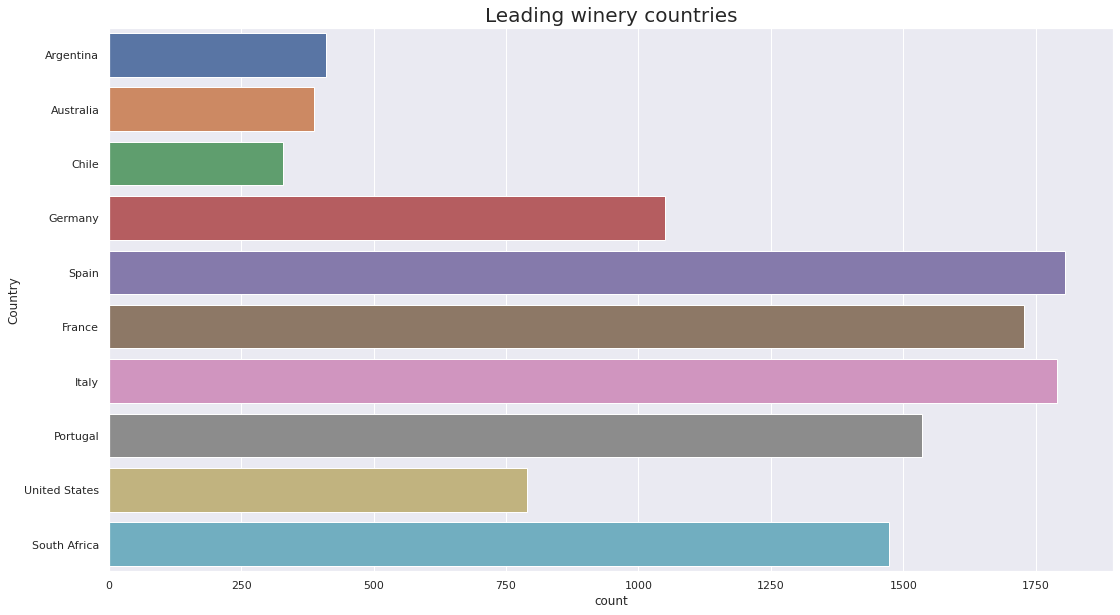

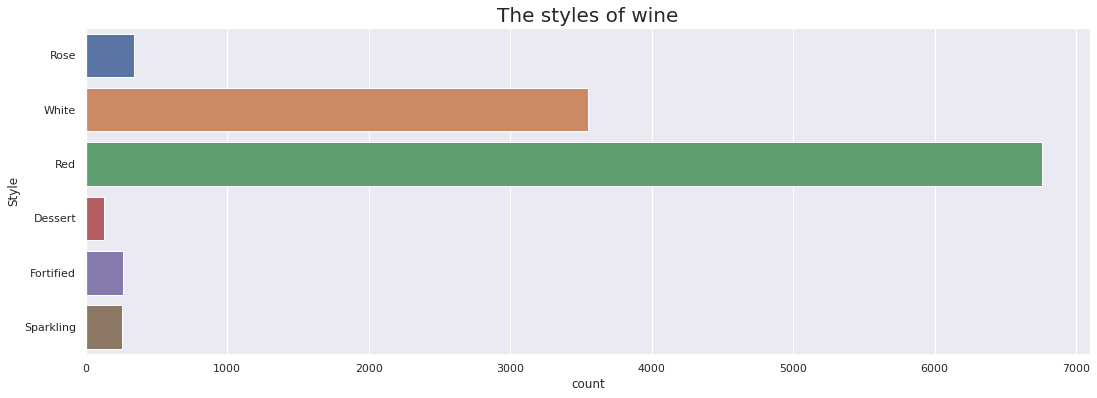

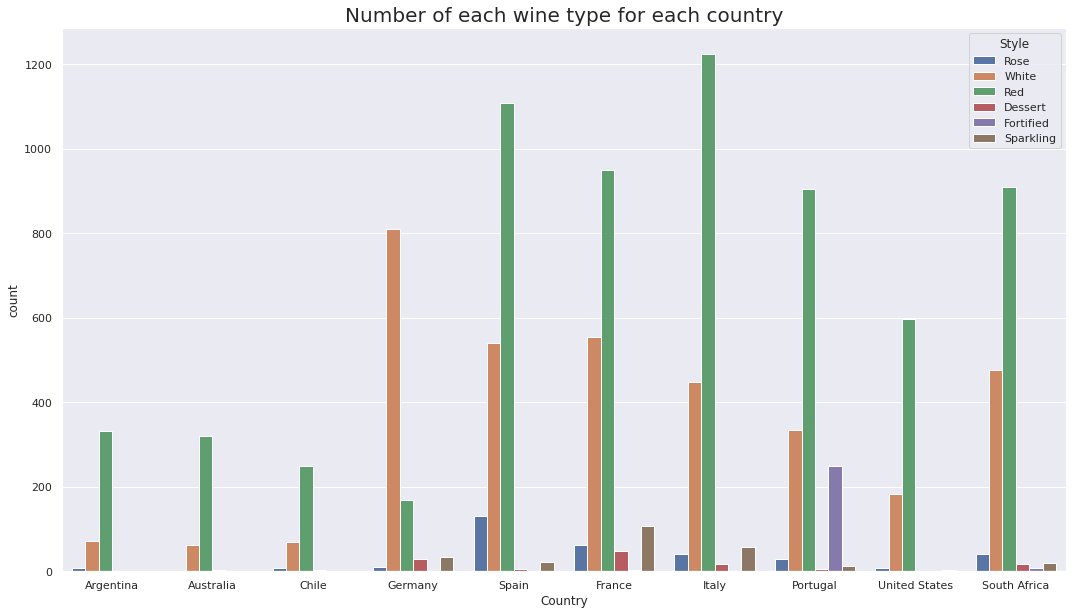

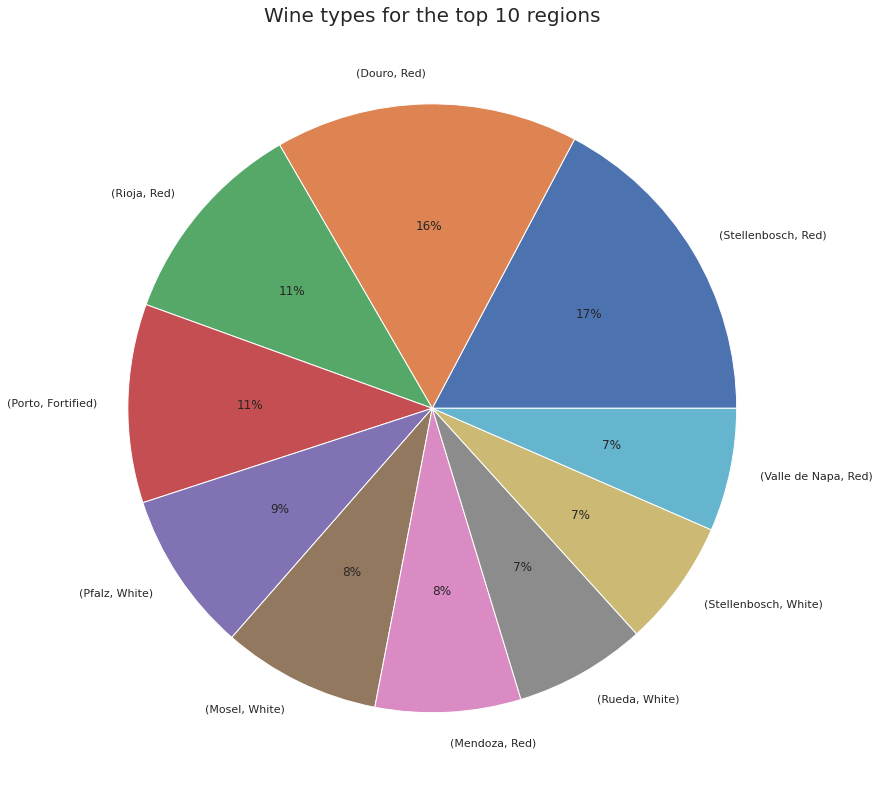

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


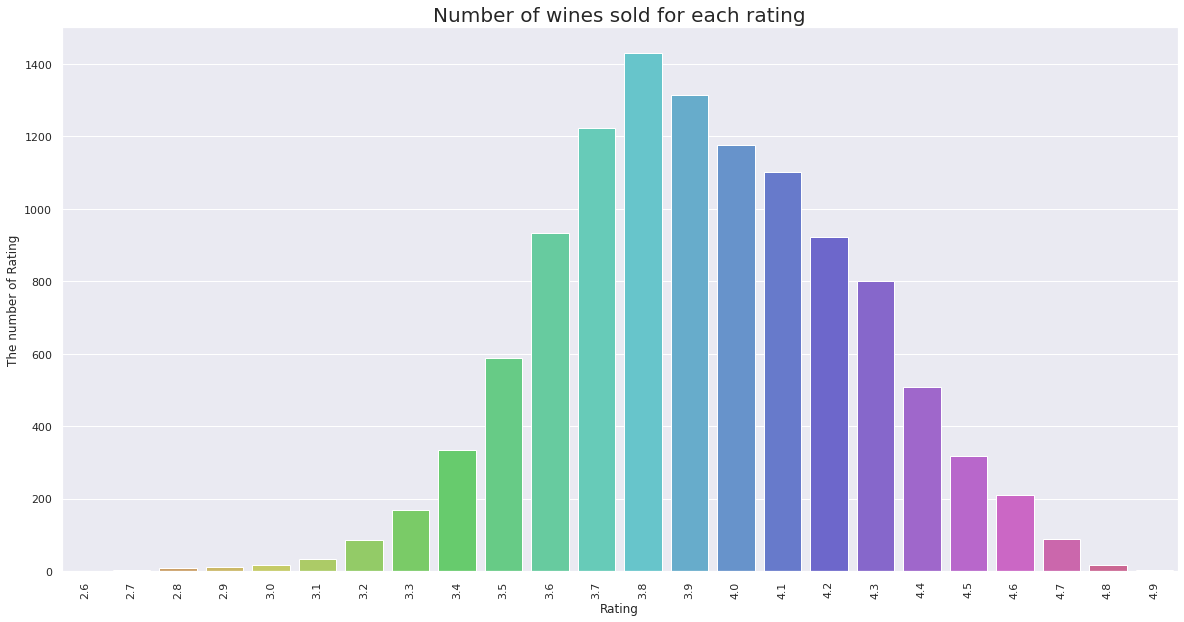

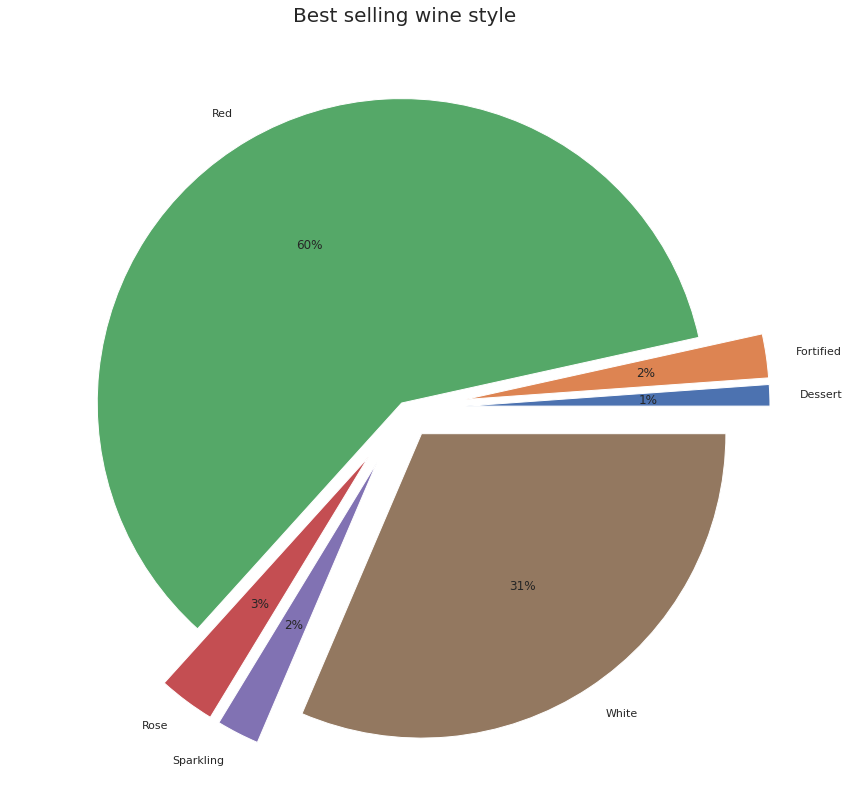

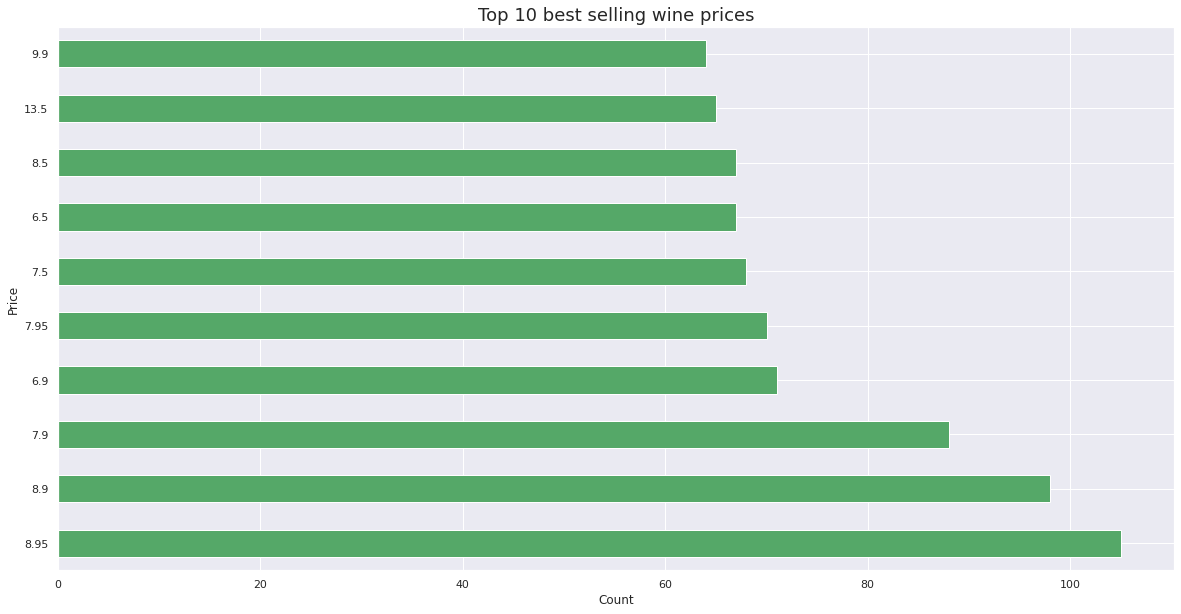

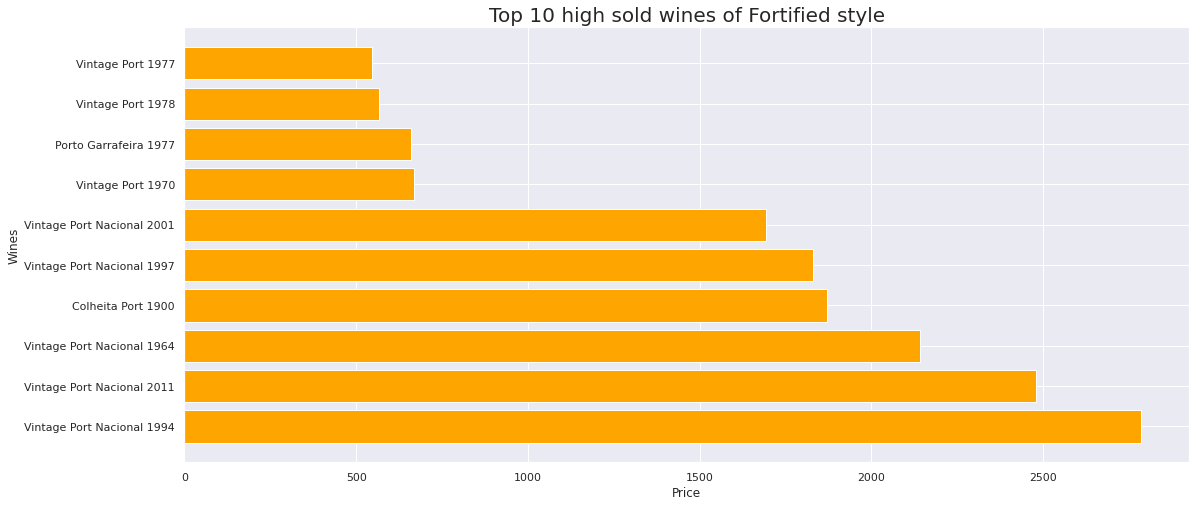

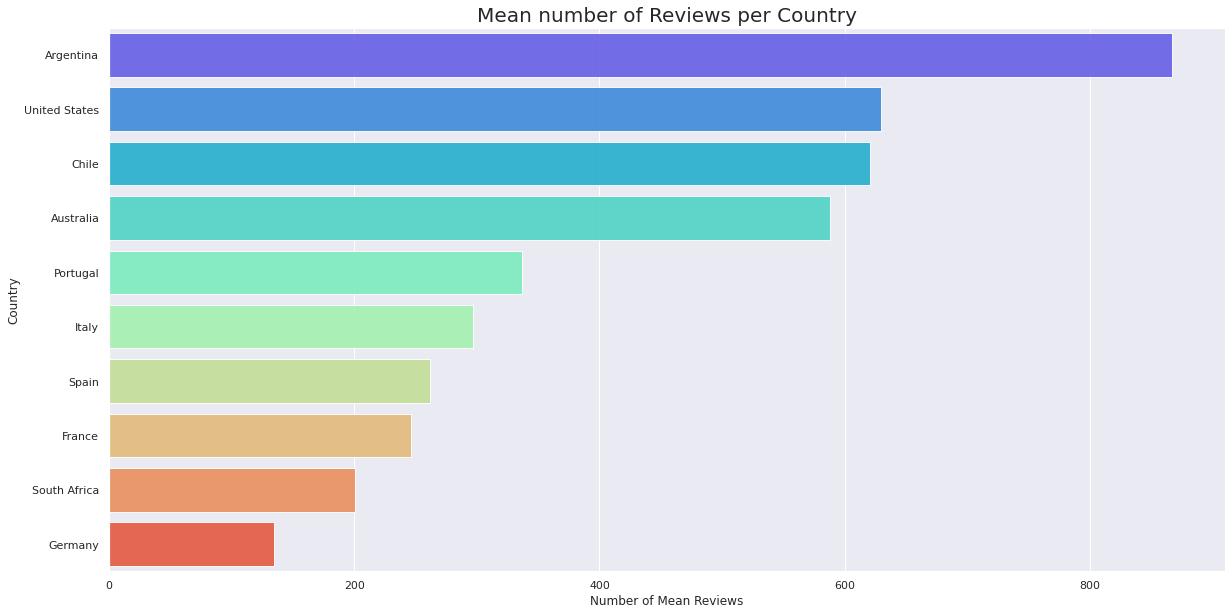

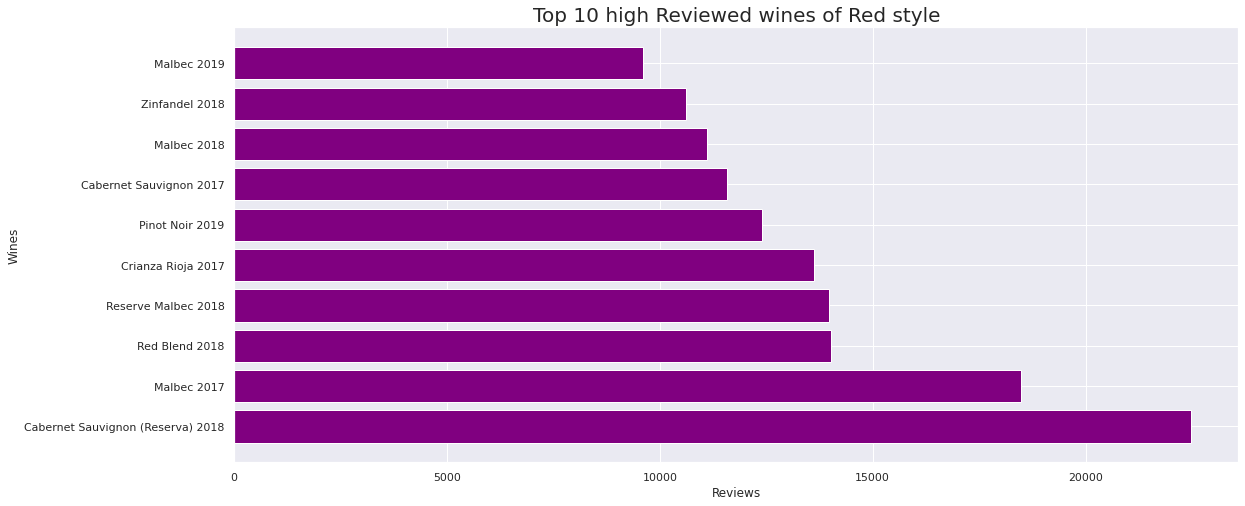

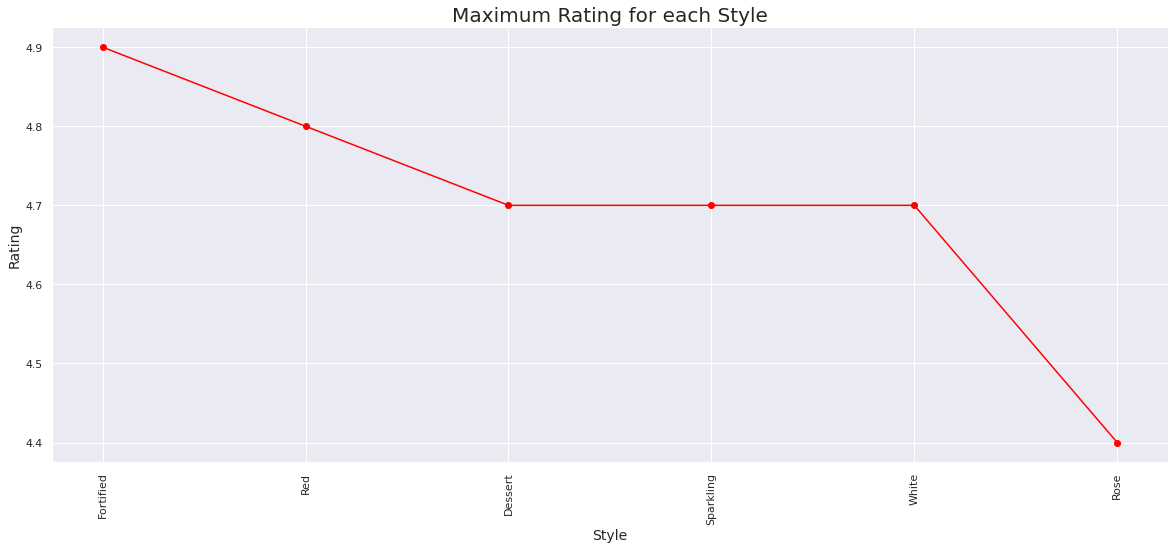

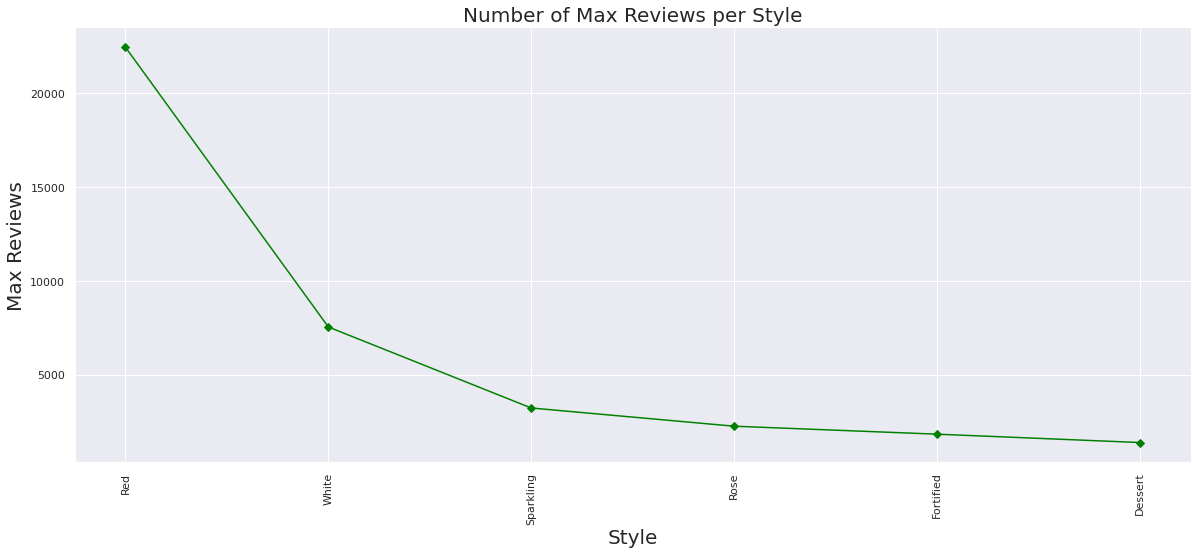

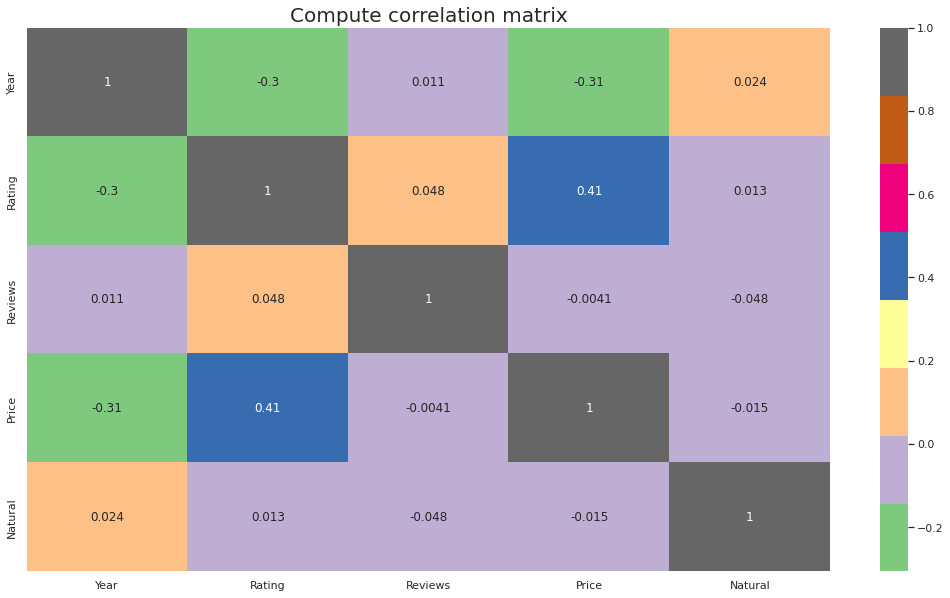

In [30]:
def print_histograms(dataset):
  get_country(dataset)
  get_wine_style(dataset)
  wine_each_country(dataset)
  wine_each_region(dataset)
  get_count_wines(dataset)
  get_style_wines(dataset)
  top_wine_price(dataset)
  top_style_wines(dataset,'Fortified')
  mean_reviews_per_country(dataset)
  top_reviews_wines(dataset,'Red')
  max_rating(dataset)
  reviews_per_style(dataset)
  compute_correlations_matrix(dataset)

print_histograms(df)

# Machine Learning

In [33]:
def LR_Model(dataset):
  """A function that takes a data set as an argument and creates and evaluates a Model using linear regression"""
  train_set, test_set = train_test_split(dataset, test_size=0.1, random_state=33)
  LR_model = linear_model.LinearRegression()

  x_train = np.asanyarray(train_set[['Rating']])
  y_train = np.asanyarray(train_set[['Price']])

  LR_model.fit(x_train, y_train)

  # We separate the coefficients theta1 and theta0
  theta1 = LR_model.coef_[0][0]
  theta0 = LR_model.intercept_[0]
  print (f'theta1= {theta1}')
  print (f'theta0= {theta0}\n')

  # Let's evaluate the model
  x_test = np.asanyarray(test_set[['Rating']])
  y_test = np.asanyarray(test_set[['Price']])

  y_predict = LR_model.predict(x_test)

  MAE = mean_absolute_error(y_test, y_predict)
  RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
  print(f"MAE= {MAE}")
  print(f"RMSE= {RMSE}")

LR_Model(df)

theta1= 153.23668066054216
theta0= -557.8862291109821

MAE= 39.108123661340535
RMSE= 91.06831766404478


In [34]:
def Multiple_LR_Model(dataset):
  """A function that takes a dataset as an argument and creates a Model using Multiple Linear Regression and evaluates it"""
  train_set, test_set = train_test_split(dataset, test_size=0.10, random_state=42)
  MLR_model = linear_model.LinearRegression()

  x_train = np.asanyarray(train_set[['Year','Rating', 'Reviews']])
  y_train = np.asanyarray(train_set[['Price']])

  MLR_model.fit (x_train, y_train)

  print('Coefficients: ', MLR_model.coef_)
  print('theta0:', MLR_model.intercept_)

  # Let's evaluate the model
  x_test = np.asanyarray(test_set[['Year','Rating', 'Reviews']])
  y_test = np.asanyarray(test_set[['Price']])
  y_predict = MLR_model.predict(x_test)

  MAE = mean_absolute_error(y_test, y_predict)
  RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
  print(f"MAE = {MAE}")
  print(f"RMSE = {RMSE}")

Multiple_LR_Model(df)

Coefficients:  [[-5.17923623e+00  1.22519703e+02 -2.57400187e-03]]
theta0: [10006.24232221]
MAE = 43.881747856720615
RMSE = 208.23715629647606
